In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import numpy as np

## DB-SCAN (Density-Based Spatial Clustering of Applications with Noise)
* Two Parameters
* Core points, border points and noise
* [See the video](https://www.youtube.com/watch?v=RDZUdRSDOok&t=403s)

Unlike kmeans, 
* It does not demand that the number of clusters be predetermined
* It does not presume spherical clusters (may not have >=2 dense clusters)
<!-- * kmeans may not be able to detect overlapped or asymmetric groups, DBSCAN can. -->



Why do we select the point at the maximum curvation?

### Hyperparameter Searching: Grid Search

In [94]:
silhouette_scores = []
purity_scores = []
ari_scores = []
nmi_scores = []
df_unique_labels = pd.DataFrame({"eps": [], "min_samples": [], "num_labels": []})

for eps in range(10, 35):
    for min_samples in range(1, 25):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labelsData = dbscan.labels_
        unique_label_num = len(set(labelsData))
        df_unique_labels = df_unique_labels.append({"eps": eps, "min_samples": min_samples, "num_labels": unique_label_num }, ignore_index=True)
        if unique_label_num > 1 & unique_label_num < len(X):
            # print("labels:", unique_label_num, "eps:", eps, "min_samples:", min_samples)
            try:
                score = metrics.silhouette_score(X, labelsData)
                
            except ValueError:
                raise
            silhouette_scores.append((score, eps, min_samples, unique_label_num,labelsData))
            purity_scores.append( (purity_score(y, y_pred), eps, min_samples, unique_label_num,labelsData) )
            ari_scores.append(metrics.adjusted_rand_score(y, y_pred))
            nmi_scores.append(metrics.normalized_mutual_info_score(y, y_pred))

max_silhouette_score, optimal_eps, optimal_min_samples, optimal_n_label, y_pred = max(silhouette_scores)[:]
print(f"the max silhouette score: {max_silhouette_score}")
print(f"Optimal eps: {optimal_eps}; Optimal min_samples: {optimal_min_samples}; optimal number of cluster: {optimal_n_label}")
print(f"Adjusted Rand index for DBSCAN performance: {metrics.adjusted_rand_score(y, y_pred)}")
print(f"Normalized mutual information for DBSCAN performance: {metrics.normalized_mutual_info_score(y, y_pred)}")
print("the ground truth of labels :", len(set(y)), "the labels_pre: ", len(set(y_pred)))
print("\n")

max_purity_score, optimal_eps, optimal_min_samples, optimal_n_label, y_pred = max(purity_scores)[:]
print(f"the max purity score: {max_silhouette_score}")
print(f"Optimal eps: {optimal_eps}; Optimal min_samples: {optimal_min_samples}; optimal number of cluster: {optimal_n_label}")
print(f"Adjusted Rand index for DBSCAN performance: {metrics.adjusted_rand_score(y, y_pred)}")
print(f"Normalized mutual information for DBSCAN performance: {metrics.normalized_mutual_info_score(y, y_pred)}")
print("the ground truth of labels :", len(set(y)), "the labels_pre: ", len(set(y_pred)))
print("\n")


the max silhouette score: 0.14911176266271708
Optimal eps: 25; Optimal min_samples: 20; optimal number of cluster: 11
Adjusted Rand index for DBSCAN performance: 0.5235916139024015
Normalized mutual information for DBSCAN performance: 0.7165588044491888
the ground truth of labels : 10 the labels_pre:  11


the max purity score: 0.14911176266271708
Optimal eps: 32; Optimal min_samples: 24; optimal number of cluster: 2
Adjusted Rand index for DBSCAN performance: 3.6749544800371906e-05
Normalized mutual information for DBSCAN performance: 0.003995386941039195
the ground truth of labels : 10 the labels_pre:  2




In [110]:
dbscan = DBSCAN(eps=15.459, min_samples=5)
dbscan.fit(X)
labelsData = dbscan.labels_
df_unique_labels = df_unique_labels.append({"eps": eps, "min_samples": min_samples, "num_labels": len(np.unique(labelsData)) }, ignore_index=True)
unique_label_num = len(set(labelsData))
print(labelsData)
if unique_label_num > 1 & unique_label_num < len(X):
    print(metrics.silhouette_score(X, labelsData))
    print(purity_score(y, labelsData))
    n_noise = list(labelsData).count(-1)
    print(f"Number of clusters found by DBSCAN: {unique_label_num}")
    print(f"Number of noise points found by DBSCAN: {n_noise}")
        

[ 0 -1 -1 ... 10 -1 19]
-0.22159583370444244
0.27945026178010474
Number of clusters found by DBSCAN: 22
Number of noise points found by DBSCAN: 1255


In [115]:
dbscan = DBSCAN(eps=32.23, min_samples=X.shape[1] * 2)
dbscan.fit(X)
labelsData = dbscan.labels_
df_unique_labels = df_unique_labels.append({"eps": eps, "min_samples": min_samples, "num_labels": len(np.unique(labelsData)) }, ignore_index=True)
unique_label_num = len(set(labelsData))
print(labelsData)
if unique_label_num > 1 & unique_label_num < len(X):
    print(metrics.silhouette_score(X, labelsData))
    print(purity_score(y, labelsData))
    n_noise = list(labelsData).count(-1)
    print(f"Number of clusters found by DBSCAN: {unique_label_num}")
    print(f"Number of noise points found by DBSCAN: {n_noise}")
        


[ 0 -1 -1 ... -1 -1 -1]
0.0862670152973876
0.2931937172774869
Number of clusters found by DBSCAN: 3
Number of noise points found by DBSCAN: 792


Visualize how epsilon and min_samples affect the resulting number of clusters.

<Axes: xlabel='eps', ylabel='min_samples'>

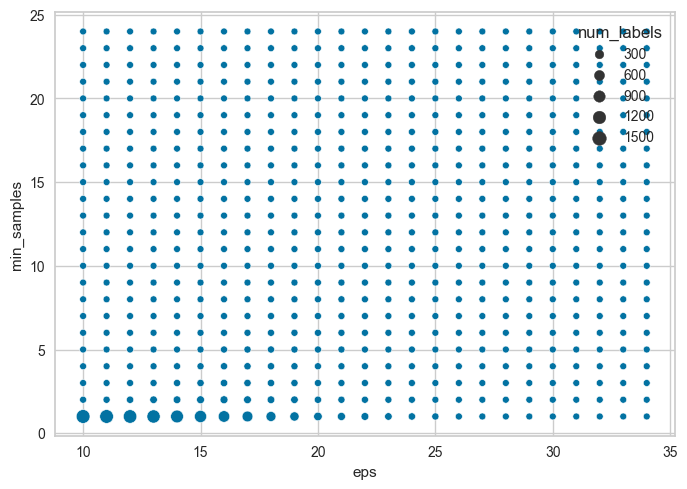

In [89]:
sns.scatterplot(data=df_unique_labels, x="eps", y="min_samples", size="num_labels")

### Using NearestNeighbors to Choose Epsilon

[[ 0.         13.41640786]
 [ 0.          6.40312424]
 [ 0.          6.40312424]]
[[0 2]
 [1 2]
 [2 1]]


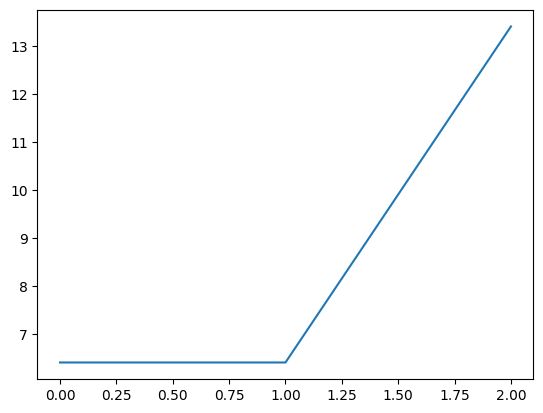

In [8]:

X = np.array([
    [2, 4],  # Superb
    [10, 15],  #  Good
    [14, 10]   # Bad
])
# for all the points, we calculate the distance to the nearest point  
neigh = NearestNeighbors(n_neighbors=2,  algorithm="auto")
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
print(distances)
print(indices)
distances = np.sort(distances[:,-1]) 
plt.plot(distances)
plt.show()





### Find optimum min_samples using k-distance graph

In [ ]:

# min_samples is the minimum number of points that must be within 'eps' distance of a core point in order for it to be considered as a cluster which is known as the k-distance graph
#The value of k is set to 2 indicating that we are using the second knee point on the elbow plot to determine the value of min_samples
k = 2
k_distance = distances[::-1][k-1]
#Finding 10 nearest neighbors of each data point
neigh = NearestNeighbors(n_neighbors=10)
#Fits the data X to the NearestNeighbors object
neigh.fit(X)
distances, indices = neigh.kneighbors(X)
distances = np.array([d[-1] for d in distances])
distances.sort()
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distances')
plt.title('K-Distance Graph')
plt.show()
#Calculateing the min_samples
min_samples = np.where(distances > k_distance)[0][0]

## Agglomerative clustering
* [Sklearn document about clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
    

In [ ]:
                                  
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,linkage="complete", affinity="cosine",n_clusters=None)
model = model.fit(X)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


model = AgglomerativeClustering( linkage="complete", affinity="cosine",n_clusters=2)

y_pred = model.fit_predict(X)
print("purity_score: %0.3f" % purity_score(y, y_pred))

Another family of clustering algorithms is the visualized clustering, e.g., [VAT, iVAT](https://medium.com/analytics-vidhya/using-visualization-algorithms-vat-ivat-to-assess-cluster-tendency-a89251a2400e#:~:text=iVAT%20is%20a%20visual%20method%20of%20assessing%20the,clearer%20densely%20black%20squares%2Frectangles%20in%20its%20printed%20map.)